<a href="https://colab.research.google.com/github/SnehaDharne/LearningAnalytics/blob/main/OULAD_with_class_balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 path = '/content/drive/MyDrive/dataset for notebooks/imputed_data_smoted.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(path)

In [ ]:
 df

,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,date,...,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_0-35,age_band_35-55,age_band_55<=,disability_Y,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA,final_result
0,11391.000000,0.0,240.0,-159.000000,1000.0,1752.000000,18.000000,0.0,78.000000,19.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.000000,300
1,11391.000000,0.0,240.0,-159.000000,1000.0,1753.000000,53.000000,0.0,85.000000,54.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.000000,300
2,11391.000000,0.0,240.0,-159.000000,1000.0,1754.000000,115.000000,0.0,80.000000,117.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.000000,300
3,11391.000000,0.0,240.0,-159.000000,1000.0,1755.000000,164.000000,0.0,85.000000,166.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.000000,300
4,11391.000000,0.0,240.0,-159.000000,1000.0,1756.000000,212.000000,0.0,82.000000,215.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.000000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422475,583293.000000,0.0,60.0,-154.000000,1000.0,24297.698647,216.212486,0.0,79.301353,213.472632,...,0.0,0.0,1.0,0.0,0.0,0.0,0.924662,0.0,0.075338,400
422476,541702.000000,0.0,120.0,-149.000000,1000.0,15003.512520,180.437401,0.0,81.492488,186.894833,...,0.0,0.0,1.0,0.0,0.0,0.0,0.502504,0.0,0.497496,400
422477,591507.925846,0.0,60.0,-56.814933,1000.0,15003.444416,207.629611,0.0,88.148054,208.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.407403,0.0,0.592597,400
422478,551212.000000,0.0,60.0,-36.000000,1000.0,34867.626878,211.388145,0.0,87.880634,222.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,400


In [ ]:
from imblearn.combine import SMOTETomek
import pandas as pd

# Separate features and target variable
feature_cols = df1.columns.tolist()
feature_cols.remove("fin")  # remove the target variable from the features

# create your X (features) and y (target variable) arrays
X = df1[feature_cols].values
y = df1["fin"].values

# Create an instance of SMOTETomek and balance the dataset
smt = SMOTETomek(random_state=0, n_jobs = -1)
X_balanced, y_balanced = smt.fit_resample(X, y)



/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


AttributeError: ignored

In [ ]:
df_balanced.to_csv('/content/drive/MyDrive/dataset for notebooks/imputed_data_smoted.csv', index = False)

In [ ]:
# Convert balanced data to Pandas DataFrame
df_balanced = pd.DataFrame(X_balanced, columns=feature_cols)
df_balanced['final_result'] = y_balanced

# Display balanced data

           id_student  num_of_prev_attempts  studied_credits  \
0        11391.000000                   0.0            240.0   
1        11391.000000                   0.0            240.0   
2        11391.000000                   0.0            240.0   
3        11391.000000                   0.0            240.0   
4        11391.000000                   0.0            240.0   
...               ...                   ...              ...   
422475  583293.000000                   0.0             60.0   
422476  541702.000000                   0.0            120.0   
422477  591507.925846                   0.0             60.0   
422478  551212.000000                   0.0             60.0   
422479  501444.000000                   0.0             60.0   

        date_registration  date_unregistration  id_assessment  date_submitted  \
0             -159.000000               1000.0    1752.000000       18.000000   
1             -159.000000               1000.0    1753.000000       5

In [ ]:
df1 = df

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
import numpy as np

from sklearn.model_selection import train_test_split


# extract the feature names from your DataFrame
feature_cols = df1.columns.tolist()
feature_cols.remove("final_result")  # remove the target variable from the features

# create your X (features) and y (target variable) arrays
X = df1[feature_cols].values
y = df1["final_result"].values

# split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define hyperparameters to tune
hyperparameters = {
    'penalty': ['l2', 'none'],
    'C': [0.1, 1, 10],
    'multi_class': ['ovr','multinomial']
}

# Create a Logistic Regression model
model = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1)

# Create a grid search object
grid_search = GridSearchCV(model, hyperparameters, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their scores
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best hyperparameters:  {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2'}
Best score:  0.7141018004014934


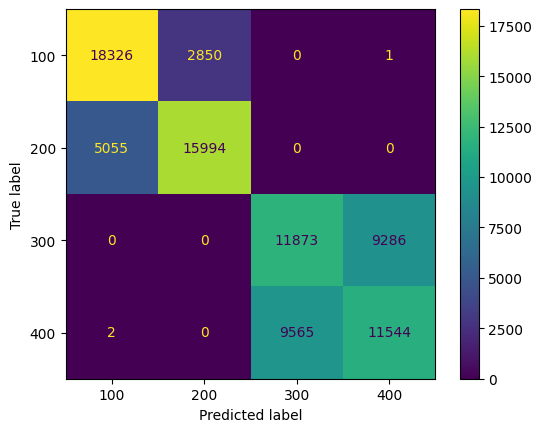

Accuracy on test set:  0.6833104525658019
              precision    recall  f1-score   support

         100       0.78      0.87      0.82     21177
         200       0.85      0.76      0.80     21049
         300       0.55      0.56      0.56     21159
         400       0.55      0.55      0.55     21111

    accuracy                           0.68     84496
   macro avg       0.69      0.68      0.68     84496
weighted avg       0.69      0.68      0.68     84496



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight

from sklearn.model_selection import train_test_split


# extract the feature names from your DataFrame
feature_cols = df.columns.tolist()
feature_cols.remove("final_result")  # remove the target variable from the features

# create your X (features) and y (target variable) arrays
X = df[feature_cols].values
y = df["final_result"].values

# split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with the best hyperparameters on the training set
# best_model = LogisticRegression(**grid_search.best_params_, random_state=0, multi_class='multinomial', solver='lbfgs', n_jobs=-1)
best_model_ovr = LogisticRegression(C=10, multi_class = 'ovr', penalty='l2',random_state=0, solver='lbfgs', n_jobs=-1)
best_model_ovr.fit(X_train, y_train)


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model's performance on the test set
y_pred_lr = best_model_ovr.predict(X_test)
ConfusionMatrixDisplay.from_estimator(best_model_ovr, X_test, y_test)
plt.show()
accuracy = best_model_ovr.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)
print(classification_report(y_test,y_pred_lr))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


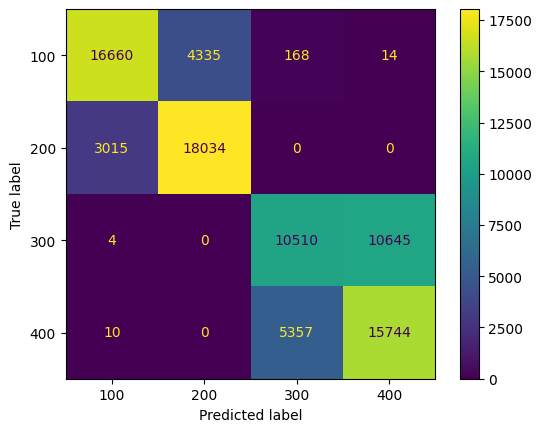

              precision    recall  f1-score   support

         100       0.85      0.79      0.82     21177
         200       0.81      0.86      0.83     21049
         300       0.66      0.50      0.57     21159
         400       0.60      0.75      0.66     21111

    accuracy                           0.72     84496
   macro avg       0.73      0.72      0.72     84496
weighted avg       0.73      0.72      0.72     84496



0.7213122514675251

In [ ]:

from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(**grid_search.best_params_, random_state=0, multi_class='multinomial', solver='lbfgs', n_jobs=-1)

clf = LogisticRegression(C=10, multi_class = 'multinomial', penalty='l2',random_state=0, solver='lbfgs', n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
# n_scores = cross_val_score(model, scoring='accuracy',)
# print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

Feature: 42, Importance: 0.00004 assessment_type_TMA
Feature: 10, Importance: 0.00041 weight
Feature: 8, Importance: 0.00113 score
Feature: 5, Importance: 0.00135 id_assessment
Feature: 11, Importance: 0.00158 module_presentation_length
Feature: 3, Importance: 0.00183 date_registration
Feature: 2, Importance: 0.00238 studied_credits
Feature: 6, Importance: 0.00977 date_submitted
Feature: 9, Importance: 0.01051 date
Feature: 4, Importance: 0.09244 date_unregistration


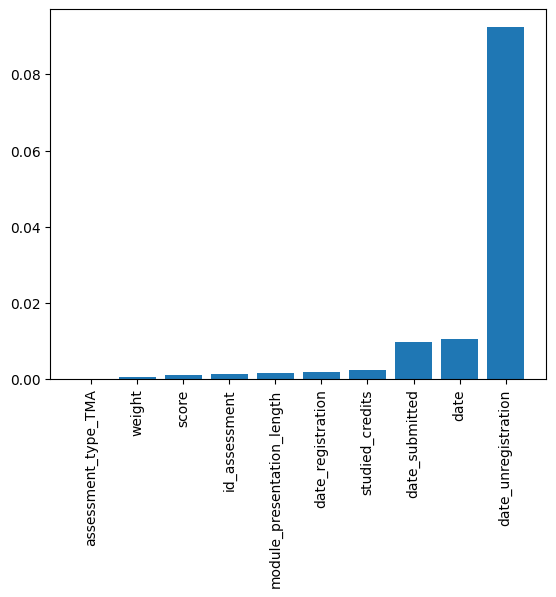

In [ ]:

importance = abs(clf.coef_[0])  # Calculate absolute value of feature importance

# Get the indices of the top n important features
n = 10  # Change this to the number of top features you want to display
top_n_idx = importance.argsort()[-n:]

# Summarize and plot the top n important features
for i in top_n_idx:
    print('Feature: %0d, Importance: %.5f' % (i, importance[i]), feature_cols[i])
plt.bar([x for x in range(len(top_n_idx))], importance[top_n_idx])
plt.xticks(range(len(top_n_idx)), [feature_cols[i] for i in top_n_idx], rotation=90)
plt.show()


[[21163    14     0     0]
 [    3 21046     0     0]
 [    0     0 20180   979]
 [    0     0  2027 19084]]
Feature: 42, Importance: 0.00004 assessment_type_TMA
Feature: 10, Importance: 0.00041 weight
Feature: 8, Importance: 0.00113 score
Feature: 5, Importance: 0.00135 id_assessment
Feature: 11, Importance: 0.00158 module_presentation_length
Feature: 3, Importance: 0.00183 date_registration
Feature: 2, Importance: 0.00238 studied_credits
Feature: 6, Importance: 0.00977 date_submitted
Feature: 9, Importance: 0.01051 date
Feature: 4, Importance: 0.09244 date_unregistration


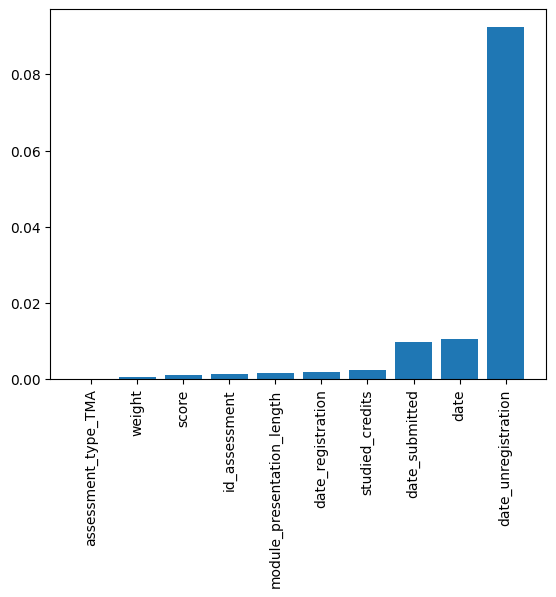

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


# extract the feature names from your DataFrame
feature_cols = df1.columns.tolist()
feature_cols.remove("final_result")  # remove the target variable from the features

# create your X (features) and y (target variable) arrays
X = df1[feature_cols].values
y = df1["final_result"].values

# split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)

# evaluate the performance of the classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)

n = 10  # Change this to the number of top features you want to display
top_n_idx = importance.argsort()[-n:]

# Summarize and plot the top n important features
for i in top_n_idx:
    print('Feature: %0d, Importance: %.5f' % (i, importance[i]), feature_cols[i])
plt.bar([x for x in range(len(top_n_idx))], importance[top_n_idx])
plt.xticks(range(len(top_n_idx)), [feature_cols[i] for i in top_n_idx], rotation=90)
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         100       1.00      1.00      1.00     21177
         200       1.00      1.00      1.00     21049
         300       0.91      0.95      0.93     21159
         400       0.95      0.90      0.93     21111

    accuracy                           0.96     84496
   macro avg       0.96      0.96      0.96     84496
weighted avg       0.96      0.96      0.96     84496



0.9642231584927097

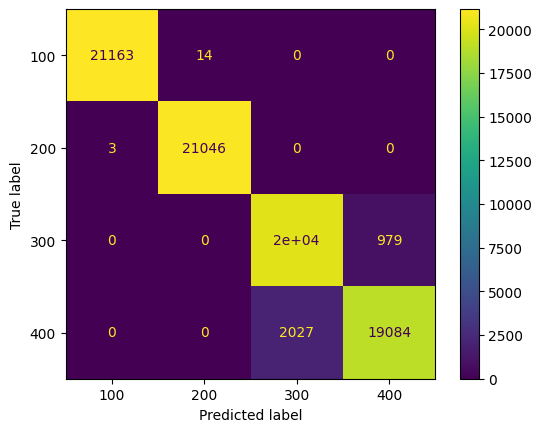

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()


In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train,y_train)
BernoulliNB()
y_pred= clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print('test accuracy:', accuracy_score(y_test, y_pred))


test accuracy: 0.6204199015338004


Feature: 42, Importance: 0.00004 assessment_type_TMA
Feature: 10, Importance: 0.00041 weight
Feature: 8, Importance: 0.00113 score
Feature: 5, Importance: 0.00135 id_assessment
Feature: 11, Importance: 0.00158 module_presentation_length
Feature: 3, Importance: 0.00183 date_registration
Feature: 2, Importance: 0.00238 studied_credits
Feature: 6, Importance: 0.00977 date_submitted
Feature: 9, Importance: 0.01051 date
Feature: 4, Importance: 0.09244 date_unregistration


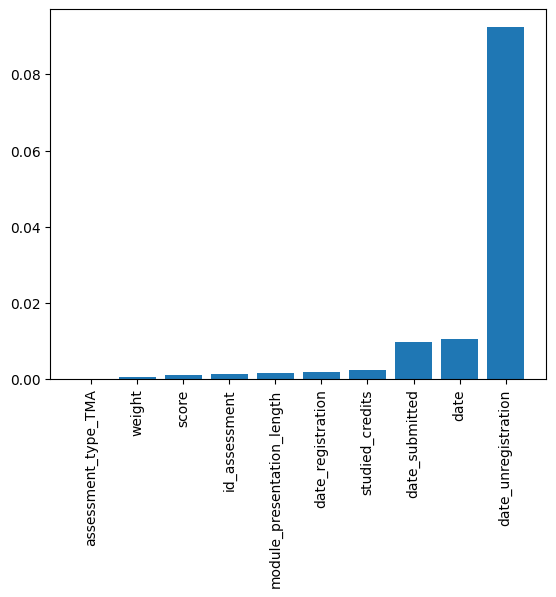

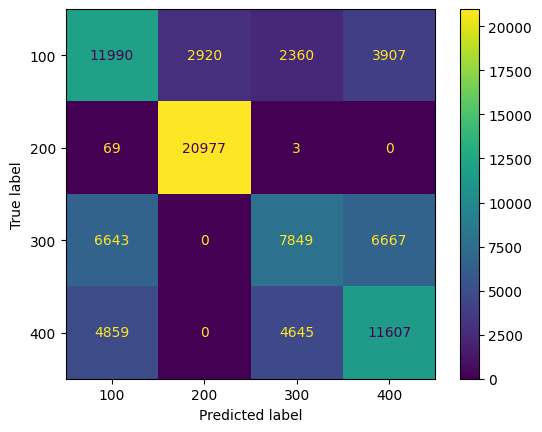

              precision    recall  f1-score   support

         100       0.51      0.57      0.54     21177
         200       0.88      1.00      0.93     21049
         300       0.53      0.37      0.44     21159
         400       0.52      0.55      0.54     21111

    accuracy                           0.62     84496
   macro avg       0.61      0.62      0.61     84496
weighted avg       0.61      0.62      0.61     84496



0.6204199015338004

In [ ]:
n = 10  # Change this to the number of top features you want to display
top_n_idx = importance.argsort()[-n:]

# Summarize and plot the top n important features
for i in top_n_idx:
    print('Feature: %0d, Importance: %.5f' % (i, importance[i]), feature_cols[i])
plt.bar([x for x in range(len(top_n_idx))], importance[top_n_idx])
plt.xticks(range(len(top_n_idx)), [feature_cols[i] for i in top_n_idx], rotation=90)
plt.show()

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

In [ ]:
#so we need to balance the number of samples (???oversampling/undersampling/smo)

In [ ]:
df.fin.value_counts()

300    106024
200     29750
400     26330
100     18558
Name: fin, dtype: int64

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

In [ ]:
class_weights

array([2.42873227, 1.51244244, 0.42652041, 1.71665954])

Feature: 42, Importance: 0.00004 assessment_type_TMA
Feature: 10, Importance: 0.00041 weight
Feature: 8, Importance: 0.00113 score
Feature: 5, Importance: 0.00135 id_assessment
Feature: 11, Importance: 0.00158 module_presentation_length
Feature: 3, Importance: 0.00183 date_registration
Feature: 2, Importance: 0.00238 studied_credits
Feature: 6, Importance: 0.00977 date_submitted
Feature: 9, Importance: 0.01051 date
Feature: 4, Importance: 0.09244 date_unregistration


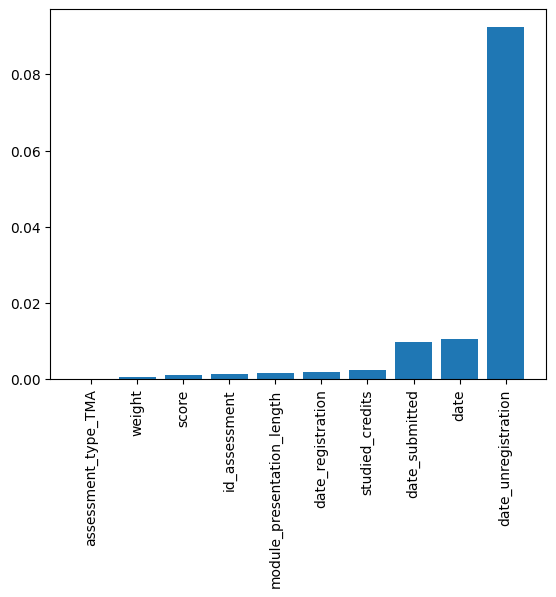

              precision    recall  f1-score   support

         100       1.00      1.00      1.00     21177
         200       1.00      1.00      1.00     21049
         300       0.78      0.81      0.79     21159
         400       0.80      0.77      0.78     21111

    accuracy                           0.89     84496
   macro avg       0.89      0.89      0.89     84496
weighted avg       0.89      0.89      0.89     84496

0.8939594773717099


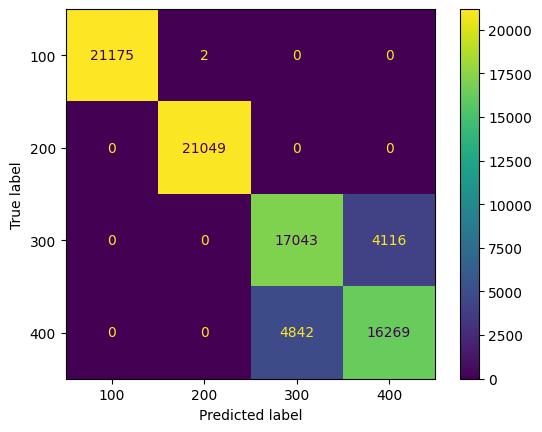

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)


n = 10  # Change this to the number of top features you want to display
top_n_idx = importance.argsort()[-n:]

# Summarize and plot the top n important features
for i in top_n_idx:
    print('Feature: %0d, Importance: %.5f' % (i, importance[i]), feature_cols[i])
plt.bar([x for x in range(len(top_n_idx))], importance[top_n_idx])
plt.xticks(range(len(top_n_idx)), [feature_cols[i] for i in top_n_idx], rotation=90)
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test,y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

              precision    recall  f1-score   support

         100       1.00      1.00      1.00     21177
         200       1.00      0.99      0.99     21049
         300       0.80      0.86      0.83     21159
         400       0.85      0.79      0.82     21111

    accuracy                           0.91     84496
   macro avg       0.91      0.91      0.91     84496
weighted avg       0.91      0.91      0.91     84496

0.9095223442529824


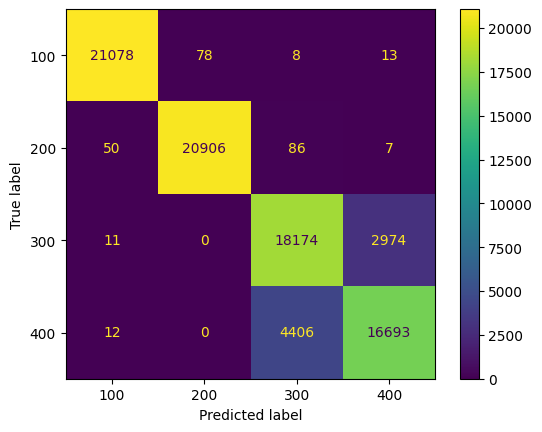

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=1,  max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test,y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# define the hyperparameter grid
param_grid = {
    'n_estimators': [80, 100, 120],
    'learning_rate': [0.9, 1.0, 1.2],
    'max_depth': [1, 2, 3],
}

# create the GridSearchCV object
gbm_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose = 2
)

# fit the GridSearchCV object to the data
gbm_grid.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters:", gbm_grid.best_params_)

# calculate the f1 score on the test set using the best estimator
y_pred = gbm_grid.best_estimator_.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Test set f1 score: {:.3f}".format(f1))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  46.8s
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  46.3s
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  47.0s
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  46.5s
[CV] END ....learning_rate=0.9, max_depth=1, n_estimators=80; total time=  47.2s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time=  58.5s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time=  58.1s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time=  57.5s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time= 1.0min
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=100; total time=  58.0s
[CV] END ...learning_rate=0.9, max_depth=1, n_estimators=120; total time= 1.2min
[CV] END ...learning_rate=0.9, max_depth=1, n_e

KeyboardInterrupt: ignored

In [ ]:

# # print the best hyperparameters
# print("Best hyperparameters:", gbm_grid.best_params_)

# calculate the f1 score on the test set using the best estimator
# y_pred = gbm_grid.best_estimator_.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Test set f1 score: {:.3f}".format(f1))


Test set f1 score: 0.904


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.9,  max_depth=2, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)
print(classification_report(y_test, y_pred))
mean_squared_error(y_test,y_pred)

              precision    recall  f1-score   support

         100       1.00      1.00      1.00      3681
         200       1.00      1.00      1.00      5860
         300       0.89      0.98      0.93     21310
         400       0.86      0.49      0.62      5282

    accuracy                           0.91     36133
   macro avg       0.94      0.87      0.89     36133
weighted avg       0.91      0.91      0.90     36133



864.0301109788836

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.9,  max_depth=3, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)
print(classification_report(y_test, y_pred))
mean_squared_error(y_test,y_pred)

              precision    recall  f1-score   support

         100       1.00      1.00      1.00      3681
         200       1.00      1.00      1.00      5860
         300       0.89      0.98      0.93     21310
         400       0.86      0.49      0.62      5282

    accuracy                           0.91     36133
   macro avg       0.94      0.87      0.89     36133
weighted avg       0.91      0.91      0.90     36133



864.0301109788836

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1,  max_depth=2, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)
print(classification_report(y_test, y_pred))
mean_squared_error(y_test,y_pred)

              precision    recall  f1-score   support

         100       1.00      1.00      1.00      3681
         200       1.00      1.00      1.00      5860
         300       0.89      0.98      0.93     21310
         400       0.86      0.49      0.62      5282

    accuracy                           0.91     36133
   macro avg       0.94      0.87      0.89     36133
weighted avg       0.91      0.91      0.90     36133



864.0301109788836

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=1,  max_depth=2, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         100       1.00      1.00      1.00      3681
         200       1.00      1.00      1.00      5860
         300       0.89      0.98      0.93     21310
         400       0.86      0.49      0.62      5282

    accuracy                           0.91     36133
   macro avg       0.94      0.87      0.89     36133
weighted avg       0.91      0.91      0.90     36133



0.9135969889021116

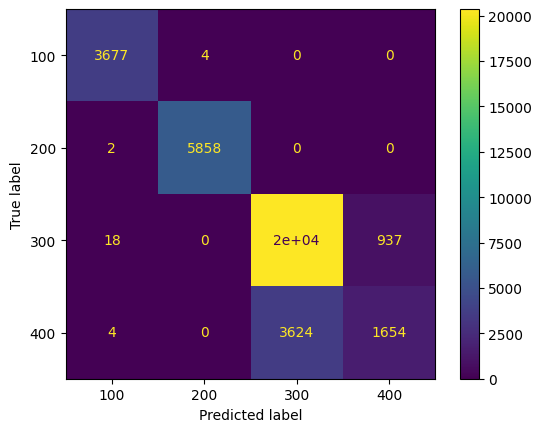

In [ ]:

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()